<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;">Module Polars</h1>
    <img src="https://raw.githubusercontent.com/pola-rs/polars-static/master/banner/polars_github_banner.svg" alt="Logo Polars" style="height:50px;">
</div>


Dans ce tutoriel, nous allons explorer la bibliothèque Polars, un outil de traitement de données en Python conçu pour gérer des ensembles de données de grande taille avec une efficacité remarquable. Cette bibliothèsque a été créée en 2019 et la dernière version de Polars est la 1.11.0, publiée récemment avec des mises à jour régulières pour améliorer les performances et ajouter des fonctionnalités . Contrairement à d'autres bibliothèques comme Pandas, Polars est optimisé pour des performances supérieures en termes de vitesse et de mémoire, en particulier sur des volumes de données importants. Grâce à une architecture basée sur le Rust et une gestion de la mémoire en colonne, Polars est capable d'exécuter des opérations intensives en un temps réduit, tout en conservant une syntaxe expressive et intuitive.

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
        Rust est un langage moderne, rapide et sécurisé, qui minimise les erreurs de mémoire grâce à une gestion efficace. Utilisé dans Polars, il permet des performances élevées et fiables pour le traitement de données massives, en surpassant les bibliothèques Python traditionnelles. 
    </p>
</div>



<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;">Pourquoi Polars ?

Polars est un excellent choix pour :

- Les utilisateurs qui manipulent des données massives et ont besoin de rapidité, même sur des machines avec des ressources limitées.
- Les cas où l’efficacité mémoire est cruciale, puisque Polars réduit drastiquement l’empreinte mémoire par rapport à Pandas.
- Les flux de travail en Data Science où l’analyse et la transformation de grandes bases de données nécessitent des calculs parallèles.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;">Objectifs du Notebook

Ce notebook vous permettra de :

- Découvrir les concepts de base de Polars et ses différences fondamentales avec Pandas.
- Comprendre et tester les avantages de performance de Polars, en comparant des opérations courantes de traitement de données entre Polars et Pandas.
- Appliquer Polars à un cas pratique en manipulant un jeu de données réel : un ensemble de données sur les protéines kinases. Nous y aborderons les étapes de chargement, de manipulation, d’analyse, et même de visualisation, pour illustrer toute la puissance de Polars dans des scénarios d'analyse de données scientifiques.

Ce jeu de données sur les kinases nous servira de base pour explorer les fonctionnalités de Polars, permettant de voir comment cette bibliothèque peut transformer les tâches de manipulation de données lourdes en Python et se positionner comme une alternative puissante à Pandas. 

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 1.1 Installation et convention


Le module polars n'est pas fourni avec la distribution Python de base. Pour l'utiliser, vous devez l'installer séparément à l'aide de pip, l'outil de gestion de paquets de Python. Pour installer Polars directement depuis votre notebook Jupyter, vous pouvez utiliser une cellule de code avec le préfixe ! Voici comment faire :

In [1]:
!pip install polars

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


Vous aurez également besoin des modules pandas pour la comparaison, matplotlib pour créer des graphiques et scipy pour réaliser une régression linaire, que vous pouvez installer ainsi :

In [2]:
!pip install pandas scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 1.2 Chargement du module

Pour charger les modules dans la mémoire de Python, on utilise la commande import habituelle et par convention on utilise des noms raccourcis : 

In [3]:
import polars as pl
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import time

- **Ligne 3** : La fonction linregress du module scipy.stats pour effectuer une régression linéaire sur les données.
- **Ligne 4** : Le module pyplot de Matplotlib, qui est utilisé pour créer des visualisations graphiques en Python.
- **Ligne 5** : Le module time (integré par défaut dans python) pour mesurer le temps d'exécution du code 

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 2. Présentation des données

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 2.1 Chargement des données

Nous chargeons le fichier CSV contenant les données des kinases en utilisant pandas et polars afin de comparer les performances des deux bibliothèques en termes de temps de lecture.    

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
        Vous devez recuperer le fichier  "kinases.csv" dans le dossier et mettre le fichier dans le même répertoire que le notebook ou changer le path à la ligne 1 du code suivant. 
    </p>
</div>



In [4]:
file_path = "kinases.csv"

start_time = time.time()
pandas_df = pd.read_csv(file_path)
pandas_read_time = time.time() - start_time

start_time = time.time()
polars_df = pl.read_csv(file_path)
polars_read_time = time.time() - start_time

print(f"Pandas read time = {pandas_read_time:.4f} secondes")
print(f"Polars read time = {polars_read_time:.4f} secondes")

Pandas read time = 0.0032 secondes
Polars read time = 0.0053 secondes


- **Ligne 3 à 5** : Mesure du temps de lecture pour pandas                                             
- **Ligne 7 à 9** : Mesure du temps de lecture pour pandas


- **time.time()** : cette fonction renvoie le temps actuel en secondes (depuis le 1er janvier 1970).                                                                                         
- **pandas_read_time** et **polars_read_time**: on calcule le temps mis pour lire le CSV en comparant le temps de départ et le temps actuel 

On observe que Polars est nettement plus rapide que Pandas pour la lecture de fichiers. Cela s'explique par l'optimisation de Polars pour les performances, notamment via le parallélisme, ce qui le rend souvent plus efficace pour le traitement de grandes quantités de données.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 2.2 Affichage des premières et dernières lignes 

Après avoir telechargé les données, nous examinons les premières et dernières lignes des DataFrames : 

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [5]:
pandas_df.head()

,Entry,Organism,Length,Creation date,Mass,PDB
0,A0A0B4J2F2,Human,783,2018-06-20,84930,NaN
1,A4L9P5,Rat,1211,2007-07-24,130801,NaN
2,A0A1D6E0S8,Maize,856,2023-05-03,93153,NaN
3,A0A8I5ZNK2,Rat,528,2023-09-13,58360,NaN
4,A1Z7T0,Fruit fly,1190,2012-01-25,131791,NaN


In [6]:
pandas_df.tail()

,Entry,Organism,Length,Creation date,Mass,PDB
1437,Q8QZX0,Mouse,417,2006-05-30,45696,NaN
1438,Q8R2S1,Mouse,544,2006-04-18,60193,NaN
1439,Q9JJX8,Mouse,414,2006-04-18,47916,NaN
1440,Q9TTK0,Rabbit,566,2005-11-22,64053,NaN
1441,Q5F361,Chicken,893,2007-01-23,100453,NaN


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [7]:
polars_df.head()

Entry,Organism,Length,Creation date,Mass,PDB
str,str,i64,str,i64,str
"""A0A0B4J2F2""","""Human""",783,"""2018-06-20""",84930,null
"""A4L9P5""","""Rat""",1211,"""2007-07-24""",130801,null
"""A0A1D6E0S8""","""Maize""",856,"""2023-05-03""",93153,null
"""A0A8I5ZNK2""","""Rat""",528,"""2023-09-13""",58360,null
"""A1Z7T0""","""Fruit fly""",1190,"""2012-01-25""",131791,null


In [8]:
polars_df.tail()

Entry,Organism,Length,Creation date,Mass,PDB
str,str,i64,str,i64,str
"""Q8QZX0""","""Mouse""",417,"""2006-05-30""",45696,null
"""Q8R2S1""","""Mouse""",544,"""2006-04-18""",60193,null
"""Q9JJX8""","""Mouse""",414,"""2006-04-18""",47916,null
"""Q9TTK0""","""Rabbit""",566,"""2005-11-22""",64053,null
"""Q5F361""","""Chicken""",893,"""2007-01-23""",100453,null


- La méthode <span style="color:blue">head()</span> affiche les premières lignes d'un DataFrame. Par défaut, elle renvoie les 5 premières lignes, mais on peut préciser le nombre de lignes en passant un argument (par exemple, head(10) pour 10 lignes).
- La méthode <span style="color:blue">tail()</span> renvoie les dernières lignes d'un DataFrame. Par défaut, elle affiche les 5 dernières lignes, avec la possibilité de spécifier un autre nombre.

Ces méthodes permettent de visualiser un échantillon du contenu, utile pour comprendre la structure et les valeurs initiales des données. Polars utilise une architecture par colonnes optimisée, idéale pour les grands ensembles de données. Il identifie et affiche également le type de chaque variable, par exemple i64 pour un entier 64 bits, permettant une gestion de données plus efficace.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 2.3 Affichage du type de données 

Dans cette section, nous explorons les types de données des colonnes de nos deux DataFrames. Connaître le type de chaque colonne est crucial pour choisir les bonnes opérations et éviter les erreurs (par exemple, effectuer des opérations mathématiques sur des colonnes de texte). 

On utlise la méthode <span style="color:blue">.dtypes</span> pour afficher le type de données de chaque colonne. 

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [9]:
pandas_df.dtypes

Entry            object
Organism         object
Length            int64
Creation date    object
Mass              int64
PDB              object
dtype: object

Cette méthode nous renvoie les types de données standards, tels que int64 pour les entiers, float64 pour les flottants, object pour les chaînes de caractères, et datetime64[ns] pour les dates. Les chaînes de caractères sont stockées par défaut en tant que object, ce qui peut parfois rendre leur manipulation moins performante. 

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [10]:
polars_df.dtypes

[String, String, Int64, String, Int64, String]

On observe que cette méthode affiche une liste des types de données de chaque colonne dans le DataFrame. Les types de données en Polars sont présentés sous une forme abrégée, ce qui les rend plus compacts. Par exemple, vous pourriez voir des types comme i64 pour un entier 64 bits, f64 pour un flottant 64 bits, Utf8 pour des chaînes de caractères et Date pour des colonnes de dates.

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
        Il est courant qu'un type de données soit mal interprété dans un DataFrame (par exemple, une colonne numérique traitée comme du texte). Heureusement, il est possible de corriger ces erreurs grâce à des méthodes de conversion disponibles dans Pandas et Polars.<br><br>
        Avec Pandas, vous pouvez utiliser des méthodes telles que <code>pd.to_numeric()</code>, <code>pd.to_datetime()</code> et <code>astype()</code>.<br>
        Avec Polars, vous pouvez également utiliser la méthode <code>.cast()</code> pour changer le type d'une colonne.
    </p>
</div>


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 2.4 Afficher les dimensions d'un DataFrame 

Pour afficher les dimensions d’un DataFrame avec les deux bibliothèques, on utilise la propriété <code>.shape</code> Cette propriété retourne les dimensions du DataFrame sous la forme d’un tuple (nombre_de_lignes, nombre_de_colonnes), ce qui permet de savoir rapidement combien d'observations et de variables sont présentes.

In [11]:
pandas_df.shape

(1442, 6)

In [12]:
polars_df.shape

(1442, 6)

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
        Contrairement à certaines méthodes, <code>.shape</code>  est une propriété (et non une méthode), ce qui signifie qu'il ne nécessite pas de parenthèses pour être utilisé.
    </p>
</div>

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 3. Statistiques

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.1 Statistiques Descriptives

A présent, nous allons calculer des statistiques descriptives de base (moyenne, écart-type, minimum, maximum, etc.) pour les colonnes numériques avec Pandas et Polars. On utilise la méthode <code>.describe()</code> pour obtenir des statistiques descriptives.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [13]:
start_time = time.time()
pandas_describe = pandas_df.describe()
pandas_describe_time = time.time() - start_time

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [14]:
start_time = time.time()
polars_describe = polars_df.describe()
polars_describe_time = time.time() - start_time

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Résultats 
    </strong>
</div>

In [15]:
print("Pandas:\n", pandas_describe, "\n")
print("Polars:\n", polars_describe)

Pandas:
             Length           Mass
count  1442.000000    1442.000000
mean    756.139390   84710.753814
std     404.195273   44764.273097
min      81.000000    9405.000000
25%     476.250000   54059.000000
50%     632.000000   71613.000000
75%     949.250000  105485.250000
max    2986.000000  340261.000000 

Polars:
 shape: (9, 7)
┌────────────┬────────────┬──────────┬────────────┬───────────────┬──────────────┬─────────────────┐
│ statistic  ┆ Entry      ┆ Organism ┆ Length     ┆ Creation date ┆ Mass         ┆ PDB             │
│ ---        ┆ ---        ┆ ---      ┆ ---        ┆ ---           ┆ ---          ┆ ---             │
│ str        ┆ str        ┆ str      ┆ f64        ┆ str           ┆ f64          ┆ str             │
╞════════════╪════════════╪══════════╪════════════╪═══════════════╪══════════════╪═════════════════╡
│ count      ┆ 1442       ┆ 1442     ┆ 1442.0     ┆ 1442          ┆ 1442.0       ┆ 488             │
│ null_count ┆ 0          ┆ 0        ┆ 0.0        ┆ 0 

On observe que Pandas affiche les statistiques avec les noms des colonnes utilisés comme en-têtes, et le type de sortie est un DataFrame. Polars a une sortie similaire à celle de Pandas, mais indique la forme (shape) du DataFrame et affiche explicitement les types de données (par exemple, f64 pour les nombres à virgule flottante). De plus, il inclut les statistiques additionnelles telles que `null_count` (nombre de valeurs manquantes) pour chaque colonne, ce qui peut être utile pour l'analyse de la qualité des données. 


In [16]:
print(f"Pandas describe time: {pandas_describe_time:.4f} seconds")
print(f"Polars describe time: {polars_describe_time:.4f} seconds")

Pandas describe time: 0.0023 seconds
Polars describe time: 0.0020 seconds


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.2 Tables de comptage

A présent, l'objectif est de compter le nombre d'occurrences de chaque type d'organisme dans la colonne "Organism" du DataFrame. La colonne "Organism" contient des chaînes de caractères (strings) représentant différents organismes. En comptant ces occurrences, on peut déterminer combien de protéines sont associées à chaque organisme dans le jeu de données.

On utilise la méthode `.value_counts()`. Cette méthode est très utile pour obtenir un aperçu rapide de la distribution des valeurs dans une colonne spécifique.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [17]:
start_time = time.time()
pandas_counts = pandas_df["Organism"].value_counts()
pandas_counts_time = time.time() - start_time

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [18]:
start_time = time.time()
polars_counts = polars_df["Organism"].value_counts()
polars_counts_time = time.time() - start_time

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Résultats 
    </strong>
</div>

In [19]:
print("\nValue Counts for 'Organism':", "\n")
print("Pandas:\n", pandas_counts, "\n")
print("Polars:\n", polars_counts)


Value Counts for 'Organism': 

Pandas:
 Organism
Human        489
Mouse        489
Rat          253
Fruit fly    103
Chicken       75
Rabbit        25
Maize          8
Name: count, dtype: int64 

Polars:
 shape: (7, 2)
┌───────────┬───────┐
│ Organism  ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Rabbit    ┆ 25    │
│ Rat       ┆ 253   │
│ Maize     ┆ 8     │
│ Chicken   ┆ 75    │
│ Human     ┆ 489   │
│ Mouse     ┆ 489   │
│ Fruit fly ┆ 103   │
└───────────┴───────┘


In [20]:
print(f"Pandas value_counts time: {pandas_counts_time:.4f} seconds")
print(f"Polars value_counts time: {polars_counts_time:.4f} seconds")

Pandas value_counts time: 0.0004 seconds
Polars value_counts time: 0.0001 seconds


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.3 Statistiques par groupe

Dans cette section, on va calculer les moyennes de certaines colonnes du DataFrame pour chaque groupe d'organismes dans la colonne "Organism". Cette opération est un calcul statistique par groupe, qui est utile pour obtenir des résumés de données en fonction de catégories (ici, chaque type d'organisme).

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [21]:
start_time = time.time()
pandas_grouped = pandas_df.groupby("Organism")[["Length", "Mass"]].mean()
pandas_grouped_time = time.time() - start_time

- **Ligne 2** : On utlise la méthode .groupby() pour regrouper des données par "Organism" et calculer la moyenne pour "Length" et "Mass". Ici, on applique les méthodes .groupby et .mean l'une à la suite de l'autre.                    


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [22]:
start_time = time.time()
polars_grouped = polars_df.group_by("Organism").agg(
    [
        pl.col("Length").mean().alias("Length_mean"),
        pl.col("Mass").mean().alias("Mass_mean"),
    ]
)
polars_grouped_time = time.time() - start_time

- **Ligne 2** : La méthode agg() est utilisée pour appliquer des fonctions d'agrégation sur chaque groupe créé par le group_by. Dans ce cas, deux agrégations sont spécifiées à l'intérieur d'une liste.
- **Ligne 3** :  On sélectionne la colonne "Length" du DataFrame pour effectuer une opération sur elle et on renomme la nouvelle colonne contenant les moyennes en "Length_mean"


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Résultats 
    </strong>
</div>

In [23]:
print("\nGrouped Mean Statistics by Organism:", "\n")
print("Pandas:\n", pandas_grouped, "\n")
print("Polars:\n", polars_grouped)


Grouped Mean Statistics by Organism: 

Pandas:
                Length          Mass
Organism                           
Chicken    720.160000  81120.880000
Fruit fly  784.844660  88154.669903
Human      771.004090  86281.190184
Maize      666.875000  73635.000000
Mouse      768.092025  85942.274029
Rabbit     591.480000  66754.200000
Rat        722.379447  81081.822134 

Polars:
 shape: (7, 3)
┌───────────┬─────────────┬──────────────┐
│ Organism  ┆ Length_mean ┆ Mass_mean    │
│ ---       ┆ ---         ┆ ---          │
│ str       ┆ f64         ┆ f64          │
╞═══════════╪═════════════╪══════════════╡
│ Mouse     ┆ 768.092025  ┆ 85942.274029 │
│ Rat       ┆ 722.379447  ┆ 81081.822134 │
│ Chicken   ┆ 720.16      ┆ 81120.88     │
│ Human     ┆ 771.00409   ┆ 86281.190184 │
│ Maize     ┆ 666.875     ┆ 73635.0      │
│ Rabbit    ┆ 591.48      ┆ 66754.2      │
│ Fruit fly ┆ 784.84466   ┆ 88154.669903 │
└───────────┴─────────────┴──────────────┘


In [24]:
print(f"Pandas group_by time: {pandas_grouped_time:.4f} seconds")
print(f"Polars group_by time: {polars_grouped_time:.4f} seconds")

Pandas group_by time: 0.0009 seconds
Polars group_by time: 0.0011 seconds


Polars a été plus rapide que Pandas pour cette opération, même si la différence semble minime (en millisecondes). Cependant, cette différence peut devenir significative pour des jeux de données beaucoup plus volumineux, où des fractions de seconde peuvent s'accumuler.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.4 Pour obtenir deux statistiques en meme temps

Dans cette section, nous allons calculer les valeurs minimales et maximales des colonnes "Length" et "Mass" pour chaque organisme dans la colonne "Organism". Ce type d'analyse est similaire à une table de pivot, permettant d’agréger des données selon des statistiques spécifiques.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [25]:
start_time = time.time()
pandas_pivot = pandas_df.pivot_table(
    index="Organism", 
    values=["Length", "Mass"], 
    aggfunc=["min", "max"]
)
pandas_pivot_time = time.time() - start_time
print("Pandas Pivot Table (min and max):\n", pandas_pivot)
print(f"Pandas pivot table time: {pandas_pivot_time:.4f} seconds")

Pandas Pivot Table (min and max):
              min           max        
          Length   Mass Length    Mass
Organism                              
Chicken      303  34688   2311  260961
Fruit fly    294  33180   2554  287025
Human        253  28160   2986  340261
Maize        294  33834    996  105988
Mouse        244  27394   2964  337000
Rabbit        81   9405   1382  158347
Rat          274  31162   2959  336587
Pandas pivot table time: 0.0027 seconds


- **Ligne 2** : Ici, la méthode pivot_table() est appelée sur le DataFrame pandas_df. Cette méthode crée un tableau croisé dynamique qui résume les données, en appliquant des fonctions d'agrégation aux valeurs spécifiées.
- **Ligne 3** : On définit la colonne "Organism" comme index du tableau croisé dynamique. Chaque valeur unique dans cette colonne deviendra une ligne du DataFrame résultant (pandas_pivot). 
- **Ligne 4** : On spécifie les colonnes dont on souhaite résumer les données, à savoir "Length" et "Mass". Ces colonnes seront agrégées pour chaque organisme.
- **Ligne 5** :  On définit les fonctions d'agrégation à appliquer aux valeurs spécifiées


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [26]:
start_time = time.time()
polars_pivot = polars_df.group_by("Organism").agg(
    [
        pl.col("Length").min().alias("Length_min"),
        pl.col("Length").max().alias("Length_max"),
        pl.col("Mass").min().alias("Mass_min"),
        pl.col("Mass").max().alias("Mass_max"),
    ]
)
polars_pivot_time = time.time() - start_time
print("\nPolars Equivalent (min and max):\n", polars_pivot)
print(f"Polars pivot table time: {polars_pivot_time:.4f} seconds")


Polars Equivalent (min and max):
 shape: (7, 5)
┌───────────┬────────────┬────────────┬──────────┬──────────┐
│ Organism  ┆ Length_min ┆ Length_max ┆ Mass_min ┆ Mass_max │
│ ---       ┆ ---        ┆ ---        ┆ ---      ┆ ---      │
│ str       ┆ i64        ┆ i64        ┆ i64      ┆ i64      │
╞═══════════╪════════════╪════════════╪══════════╪══════════╡
│ Rat       ┆ 274        ┆ 2959       ┆ 31162    ┆ 336587   │
│ Rabbit    ┆ 81         ┆ 1382       ┆ 9405     ┆ 158347   │
│ Chicken   ┆ 303        ┆ 2311       ┆ 34688    ┆ 260961   │
│ Maize     ┆ 294        ┆ 996        ┆ 33834    ┆ 105988   │
│ Fruit fly ┆ 294        ┆ 2554       ┆ 33180    ┆ 287025   │
│ Human     ┆ 253        ┆ 2986       ┆ 28160    ┆ 340261   │
│ Mouse     ┆ 244        ┆ 2964       ┆ 27394    ┆ 337000   │
└───────────┴────────────┴────────────┴──────────┴──────────┘
Polars pivot table time: 0.0007 seconds


- **Ligne 2** : on créer un tableau pivot à partir de polars_df  en regroupant les données par la colonne "Organism". agg([...]) indique que nous allons effectuer des agrégations sur chaque groupe. 
- **Ligne 3 à 6** : on récupere les valeurs souhaités depuis les colonnes indiques après .col 



Le calcul de temps montre que Polars est significativement plus rapide que Pandas pour les opérations de table de pivot ou d’agrégation similaire sur des données regroupées. Cette différence de performance peut être essentielle lorsque l'on travaille avec des datasets plus volumineux, car elle permet de réduire le temps de calcul et d’optimiser l’efficacité des analyses.

<span style="color:blue">Conclusion</span>

- Pour des opérations de pivot et d'agrégation nécessitant des calculs de minimum et maximum, Polars présente un avantage en termes de rapidité.
- Dans un contexte de bioinformatique ou d’analyse de données volumineuses, Polars peut offrir une meilleure performance, permettant d'obtenir des résultats plus rapidement tout en conservant des ressources système.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.5 Analyse de données numériques

Dans cette section, le code crée un graphique de dispersion pour représenter la relation entre la longueur ("Length") et la masse ("Mass") des protéines en utilisant les bibliothèques Pandas et Polars, avec `Matplotlib` pour la visualisation.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

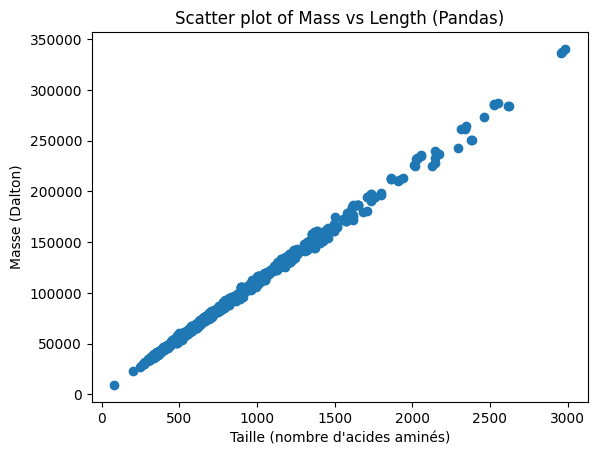

In [27]:
start_time = time.time()
fig, ax = plt.subplots()
ax.scatter(pandas_df["Length"], pandas_df["Mass"])
ax.set_xlabel("Taille (nombre d'acides aminés)")
ax.set_ylabel("Masse (Dalton)")
plt.title("Scatter plot of Mass vs Length (Pandas)")
plt.show()
pandas_scatter_time = time.time() - start_time

- **Ligne 2** : On créer une nouvelle figure (fig) et un axe (ax) pour le tracé à l'aide de Matplotlib. Cela configure l'environnement pour dessiner des graphiques.
- **Ligne 3** :  On créer un nuage de points (scatter plot) sur l'axe ax, en utilisant les valeurs de la colonne "Length" pour l'axe des x et les valeurs de la colonne "Mass" pour l'axe des y du DataFrame pandas_df.
- **Ligne 4 et 5** : on définit les noms des axes x et y 
- **Ligne 6** : on définit le nom de notre graphique 
- **Ligne 7** : Affiche le graphique à l'écran


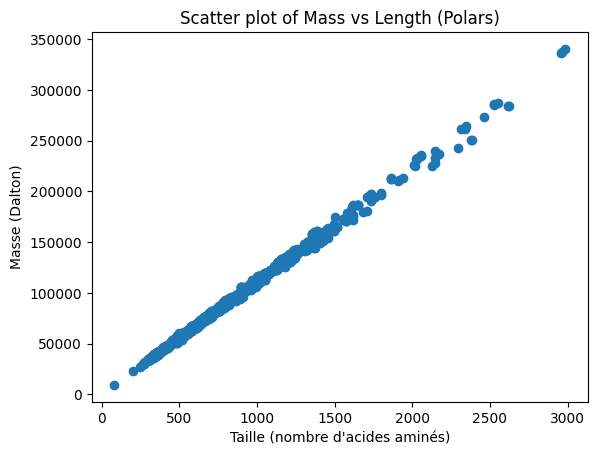

In [28]:
length_series = polars_df["Length"].to_numpy()
mass_series = polars_df["Mass"].to_numpy()

start_time = time.time()
fig, ax = plt.subplots()
ax.scatter(length_series, mass_series)
ax.set_xlabel("Taille (nombre d'acides aminés)")
ax.set_ylabel("Masse (Dalton)")
plt.title("Scatter plot of Mass vs Length (Polars)")
plt.show()
polars_scatter_time = time.time() - start_time

- **Ligne 1 et 2** : ici on extrait deux colonnes d'un DataFrame Polars (polars_df) et les convertit en tableaux NumPy, length_series et mass_series.

Les deux graphiques montrent une relation linéaire entre la longueur et la masse des protéines, ce qui est attendu en bioinformatique car la masse d'une protéine augmente généralement avec le nombre d'acides aminés.

In [29]:
print(f"Pandas scatter plot time: {pandas_scatter_time:.4f} seconds")
print(f"Polars scatter plot time: {polars_scatter_time:.4f} seconds")

Pandas scatter plot time: 0.0694 seconds
Polars scatter plot time: 0.0825 seconds


Bien que les différences de temps d'exécution soient minimes dans ce cas, Polars a montré une légère amélioration de performance. Cependant, pour des opérations de visualisation avec Matplotlib, cette différence est moins marquée car le temps est principalement influencé par Matplotlib lui-même.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.6 Régression linéaire

Nous allons effectuer une régression linéairepour déterminer les paramètres de la droite qui ajuste le mieux la relation entre la longueur ("Length") et la masse ("Mass") des protéines. La fonction `linregress()` du module `scipy.stats` est utilisée pour cela, permettant de calculer la pente (slope) et l'ordonnée à l'origine (intercept) de la droite de régression.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [30]:
start_time = time.time()
pandas_model = linregress(pandas_df["Length"], pandas_df["Mass"])
pandas_regression_time = time.time() - start_time
print("\nPandas Linear Regression Results:")
print(f"Slope: {pandas_model.slope}, Intercept: {pandas_model.intercept}")


Pandas Linear Regression Results:
Slope: 110.63478918698125, Intercept: 1055.4318346792134


- **Ligne 2** : la fonction linregress(...) calcule les paramètres d'une droite de régression linéaire (pente, intercept, coefficient de corrélation, etc.) entre les deux ensembles de données soit les deux colonnes qu'on sélectionne. 
- **Ligne 5** : ici pandas_model.slope accède à la pente de la droite de régression. La pente indique comment la masse change en fonction de la longueur. Et pandas_model.intercept accède à l'ordonnée à l'origine de la droite de régression, c'est-à-dire la valeur de la masse lorsque la longueur est égale à zéro. Cela donne un point de départ pour la ligne de régression sur le graphique.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [31]:
length_array = polars_df["Length"].to_numpy()
mass_array = polars_df["Mass"].to_numpy()

start_time = time.time()
polars_model = linregress(length_array, mass_array)
polars_regression_time = time.time() - start_time

print("\nPolars Linear Regression Results:")
print(f"Slope: {polars_model.slope}, Intercept: {polars_model.intercept}")


Polars Linear Regression Results:
Slope: 110.63478918698125, Intercept: 1055.4318346792134


- **Ligne 1 et 2** : on convertit les colonnes du DataFrame polars_df en tableaux NumPy comme expliqué précédemment. 


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Résultats 
    </strong>
</div>

In [32]:
print(f"Pandas linear regression time: {pandas_regression_time:.4f} seconds")
print(f"Polars linear regression time: {polars_regression_time:.4f} seconds")

Pandas linear regression time: 0.0005 seconds
Polars linear regression time: 0.0004 seconds


**Interprétation des Résultats**
- Paramètres de la Régression : Les résultats de la régression linéaire (pente de 110,63 et intercept de 1055,43) sont identiques pour les deux bibliothèques, confirmant que la relation entre la longueur et la masse des protéines est cohérente et linéaire dans les deux cas.
- Différence de Performance : Polars s'avère légèrement plus rapide pour cette opération. Bien que la différence de temps soit minime, elle peut s’accumuler dans le cadre d'analyses de grande envergure.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 3.7 Scatter Plot with Regression Line

Dans la section suivante, le code crée un graphique de dispersion avec une **ligne de régression linéaire** superposée pour illustrer la relation entre la taille et la masse des protéines. Deux versions du graphique sont créées : une avec **Pandas** et l'autre avec **Polars**.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

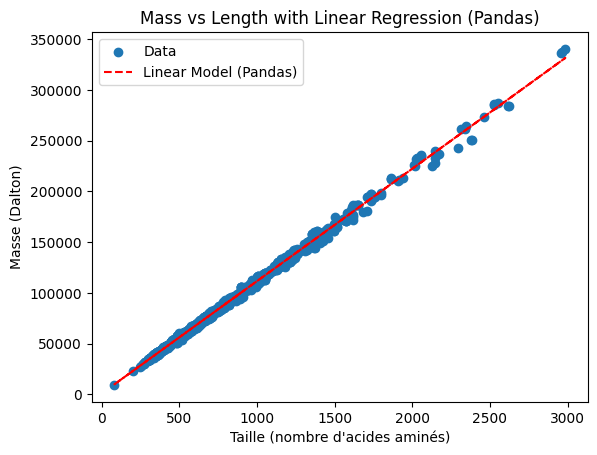

In [33]:
fig, ax = plt.subplots()
ax.scatter(pandas_df["Length"], pandas_df["Mass"], label="Data")
ax.plot(
    pandas_df["Length"],
    pandas_df["Length"] * pandas_model.slope + pandas_model.intercept,
    color="red",
    linestyle="--",
    label="Linear Model (Pandas)",
)
ax.set_xlabel("Taille (nombre d'acides aminés)")
ax.set_ylabel("Masse (Dalton)")
ax.legend()
plt.title("Mass vs Length with Linear Regression (Pandas)")
plt.show()

- **Ligne 3 à 7** : ou utilise plot pour dessiner la ligne de régression linéaire : la formule qu'on donne calcule les valeurs prédites de masse en utilisant la pente et l'ordonnée à l'origine de votre modèle de régression. Les paramètres color et linestyle définissent la couleur rouge et le style de ligne en pointillés pour la ligne de régression. Label attribue un nom à cette courbe pour la légende.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

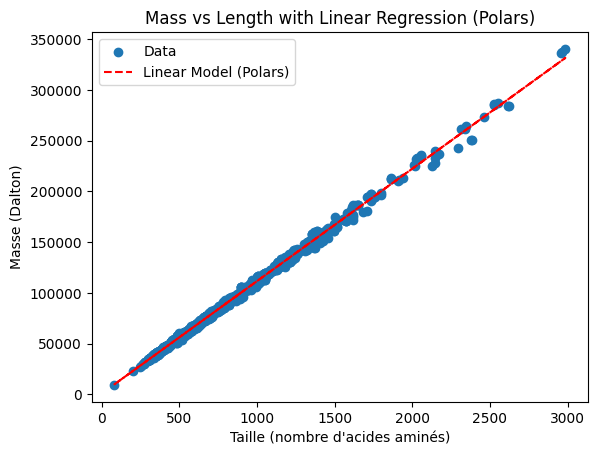

In [34]:
length_array = polars_df["Length"].to_numpy()
mass_array = polars_df["Mass"].to_numpy()

fig, ax = plt.subplots()
ax.scatter(length_array, mass_array, label="Data")

ax.plot(
    length_array,
    length_array * polars_model.slope + polars_model.intercept,
    color="red",
    linestyle="--",
    label="Linear Model (Polars)",
)
ax.set_xlabel("Taille (nombre d'acides aminés)")
ax.set_ylabel("Masse (Dalton)")
ax.legend()
plt.title("Mass vs Length with Linear Regression (Polars)")
plt.show()

**Interprétation des Graphiques**

- **Relation linéaire** : Les deux graphiques montrent une ligne de régression linéaire (en rouge) qui passe près des points de données, confirmant une forte relation linéaire entre la taille et la masse des protéines.
- **Comparaison Pandas vs Polars** : Les graphiques produits par Pandas et Polars sont identiques visuellement. La seule différence réside dans la source des données (Pandas ou Polars), mais cela n'affecte pas le résultat final.

**Performance** : Bien que Polars puisse offrir un léger avantage en termes de temps de calcul pour préparer les données, l’affichage des graphiques prend un temps similaire car il dépend principalement de Matplotlib.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 4. Analyse de données temporelles

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 4.1 Conversion en format datetime

Nous convertissons la colonne Creation date au format datetime, ce qui est essentiel pour toutes les opérations temporelles.

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
        La conversion au format datetime utilise pd.to_datetime, qui détecte automatiquement le format. En revanche, Polars requiert une conversion explicite via str.strptime pour définir le format.
    </p>
</div>

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [35]:
pandas_df["Creation date"] = pd.to_datetime(pandas_df["Creation date"])

- **pd.to_datetime()** est une fonction de Pandas qui convertit les valeurs de la colonne "Creation date" en objets de type datetime. Ce format permet d'effectuer des opérations spécifiques aux dates, comme le tri, le filtrage par période, ou les calculs de différences entre dates.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [36]:
polars_df = polars_df.with_columns(
    pl.col("Creation date").str.strptime(pl.Datetime, "%Y-%m-%d")
)

- **Ligne 1** : on sélectionne la colonne "Creation date" avec pl.col("Creation date").
- **Ligne 2** : On utilise .str.strptime(pl.Datetime, "%Y-%m-%d") pour convertir les valeurs en format datetime, en indiquant que la chaîne doit être interprétée comme une date au format "année-mois-jour".

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 4.2 Obtention des premières et dernières dates de référence pour chaque organisme

Nous voulons connaître les premières et dernières dates de référence des kinases pour chaque organisme.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>


Dans Pandas, nous utilisons pivot_table avec min et max pour calculer ces dates. Cette approche est intuitive, mais elle peut être plus lente sur des datasets volumineux.

In [37]:
start_time = time.time()
date_ranges_pandas = pandas_df.pivot_table(
    index="Organism", values="Creation date", aggfunc=["min", "max"]
)
execution_time_pandas = time.time() - start_time
print("Temps d'exécution pour Pandas : {:.4f} secondes".format(execution_time_pandas))
print(date_ranges_pandas.head())

Temps d'exécution pour Pandas : 0.0031 secondes
                    min           max
          Creation date Creation date
Organism                             
Chicken      1986-07-21    2021-02-10
Fruit fly    1986-07-21    2023-09-13
Human        1986-07-21    2018-06-20
Maize        1990-08-01    2023-05-03
Mouse        1986-07-21    2017-03-15


- **Ligne 1** : Démarrer le chronomètre en enregistrant l'heure actuelle avec start_time = time.time().
- **Ligne 2** : Utiliser pivot_table pour créer un tableau récapitulatif dans pandas_df, en regroupant par "Organism" et en obtenant les dates minimales et maximales de la colonne "Creation date".
- **Ligne 6** : Calculer le temps d'exécution en soustrayant start_time de l'heure actuelle, puis stocker le résultat dans execution_time_pandas.


Le code a pris environ 0.0065 secondes pour exécuter l'opération dans Pandas.
Les résultats affichent les dates les plus anciennes et les plus récentes de référence pour chaque organisme.
Le tableau montre que les dates varient entre 1986 et 2023 pour les organismes listés.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

Nous utilisons group_by et agg avec min et max pour obtenir les mêmes résultats. Polars est souvent plus rapide pour des calculs d'agrégation, surtout pour des grands ensembles de données.

In [38]:
start_time = time.time()
date_ranges_polars = (
    polars_df
    .group_by("Organism")
    .agg([
        pl.col("Creation date").min().alias("min_date"),
        pl.col("Creation date").max().alias("max_date")
    ])
)
execution_time_polars = time.time() - start_time
print(f"Temps d'exécution pour Polars : {execution_time_polars:.4f} secondes")
print(date_ranges_polars.head())

Temps d'exécution pour Polars : 0.0007 secondes
shape: (5, 3)
┌───────────┬─────────────────────┬─────────────────────┐
│ Organism  ┆ min_date            ┆ max_date            │
│ ---       ┆ ---                 ┆ ---                 │
│ str       ┆ datetime[μs]        ┆ datetime[μs]        │
╞═══════════╪═════════════════════╪═════════════════════╡
│ Maize     ┆ 1990-08-01 00:00:00 ┆ 2023-05-03 00:00:00 │
│ Rabbit    ┆ 1986-07-21 00:00:00 ┆ 2010-03-02 00:00:00 │
│ Chicken   ┆ 1986-07-21 00:00:00 ┆ 2021-02-10 00:00:00 │
│ Mouse     ┆ 1986-07-21 00:00:00 ┆ 2017-03-15 00:00:00 │
│ Fruit fly ┆ 1986-07-21 00:00:00 ┆ 2023-09-13 00:00:00 │
└───────────┴─────────────────────┴─────────────────────┘


- **Ligne 2** : Regroupe les données dans `polars_df` par la colonne `Organism`.
- **Ligne 3** : Calcule la première date de référence (valeur minimale) dans la colonne `Creation date` pour chaque groupe et la nomme `First Reference`.
- **Ligne 4** : Calcule la dernière date de référence (valeur maximale) dans la colonne `Creation date` pour chaque groupe et la nomme `Last Reference`.
- **Ligne 6** : Calcule le temps d'exécution de l'opération en soustrayant le temps de début de l'opération du temps actuel.
- **Ligne 7** : Affiche le temps d'exécution total pour l'opération en secondes, formaté avec quatre décimales.
- **Ligne 8** : Affiche les cinq premières lignes du DataFrame `date_ranges_polars` pour examiner les premières et dernières dates de référence par organisme.

Polars a pris environ 0.0010 secondes pour exécuter la même opération, soit environ six fois plus rapide que Pandas pour cette tâche.  
Les dates correspondent aux résultats de Pandas, confirmant la cohérence entre les deux bibliothèques.


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 4.3 Comptage du nombre de kinases référencées chaque année

Nous voulons savoir combien de kinases ont été référencées chaque année.

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

Dans Pandas, nous utilisons value_counts pour compter les occurrences par date, puis resample("Y") pour regrouper par année. Cette approche est efficace pour des datasets de taille moyenne.

In [39]:
start_time = time.time()
kinases_by_year_pandas = (
    pandas_df["Creation date"]
    .value_counts()
    .resample("YE")
    .sum()
    .sort_values(ascending=False)
    .head()
)
execution_time_pandas = time.time() - start_time
print(f"Temps d'exécution pour Pandas : {execution_time_pandas:.4f} secondes")
print("Répartition annuelle des kinases (Pandas) :")
print(kinases_by_year_pandas)

Temps d'exécution pour Pandas : 0.0022 secondes
Répartition annuelle des kinases (Pandas) :
Creation date
2006-12-31    167
2005-12-31    136
2004-12-31    118
2003-12-31    104
2007-12-31     88
Name: count, dtype: int64




- **Ligne 4** : Utilise `.value_counts()` pour compter les occurrences dans la colonne `Creation date` du DataFrame Pandas.
- **Ligne 5** : Rééchantillonne les données par années complètes avec `.resample("YE")`.
- **Ligne 6** : Calcule la somme des valeurs pour chaque année rééchantillonnée avec `.sum()`.
- **Ligne 7** : Trie les valeurs résultantes par ordre décroissant avec `.sort_values(ascending=False)`.
- **Ligne 8** : Sélectionne les cinq années ayant les occurrences les plus élevées avec `.head()`.

En 2006, 167 kinases ont été référencées dans UniProt. La deuxième « meilleure » année est 2005 avec 136 protéines.



<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>


En Polars, groupby_dynamic permet de regrouper dynamiquement par année, ce qui est performant pour des données volumineuses nécessitant un traitement temporel.

In [40]:
start_time = time.time()
kinases_by_year_polars = (
    polars_df
    .with_columns(pl.col("Creation date").dt.year().alias("year"))
    .group_by("year")
    .agg(pl.count("Creation date").alias("count"))
    .sort("count", descending=True)
    .head(5)
)
execution_time_polars = time.time() - start_time
print(f"Temps d'exécution pour Polars : {execution_time_polars:.4f} secondes")
print(kinases_by_year_polars)

Temps d'exécution pour Polars : 0.0012 secondes
shape: (5, 2)
┌──────┬───────┐
│ year ┆ count │
│ ---  ┆ ---   │
│ i32  ┆ u32   │
╞══════╪═══════╡
│ 2006 ┆ 167   │
│ 2005 ┆ 136   │
│ 2004 ┆ 118   │
│ 2003 ┆ 104   │
│ 2001 ┆ 88    │
└──────┴───────┘


- **Ligne 2** : Déclare la variable `kinases_by_year_polars` pour stocker les résultats de l'opération.
- **Ligne 3** : Utilise `.with_columns()` pour créer une nouvelle colonne appelée `year`, extraite de la colonne `Creation date` avec `.dt.year()`, qui convertit chaque date en son année correspondante.
- **Ligne 4** : Regroupe les données par la nouvelle colonne `year` avec `.group_by("year")`.
- **Ligne 5** : Agrège les données dans chaque groupe en comptant le nombre d'occurrences dans la colonne `Creation date` avec `pl.count("Creation date")` et nomme cette nouvelle colonne `count` avec `.alias("count")`.
- **Ligne 6** : Trie les résultats agrégés par ordre décroissant de la colonne `count` avec `.sort("count", descending=True)`.
- **Ligne 7** : Sélectionne les cinq premiers résultats avec `.head(5)`, représentant les cinq années ayant le plus grand nombre d'occurrences.

Les deux méthodes, en Pandas et en Polars, arrivent aux mêmes résultats en identifiant les années avec le plus grand nombre de kinases. Pandas utilise une approche basée sur des étapes intermédiaires, comme value_counts et resample, ce qui le rend intuitif mais légèrement plus lent. En revanche, Polars adopte une méthode plus directe, en extrayant l'année avec .dt.year et en regroupant les données avec group_by, ce qui optimise les performances.

Polars offre une meilleure performance dans cet exemple, surtout pour des regroupements et agrégations sur des colonnes de type datetime. Cette rapidité peut devenir un avantage crucial pour des jeux de données volumineux ou des opérations répétées.

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 4.4 Visualisation de la distribution des kinases référencées par année

<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

Dans Pandas, nous utilisons value_counts pour compter les occurrences par date, puis resample("YE") pour regrouper par année. Cette approche est efficace pour des datasets de taille moyenne.
Sur Pandas, plot() intégré permet de créer rapidement des visualisations.

Temps d'exécution Pandas : 0.0670 secondes


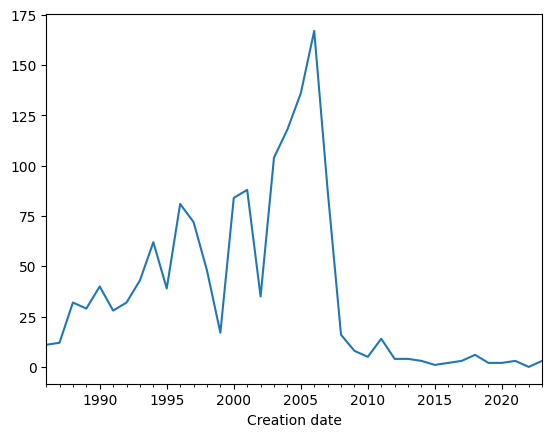

In [41]:
start_time = time.time()
(
    pandas_df["Creation date"]
    .value_counts()
    .resample("YE")  
    .sum()
    .plot()
)
plt.savefig("kinases3.png")
execution_time_pandas = time.time() - start_time
print(f"Temps d'exécution Pandas : {execution_time_pandas:.4f} secondes")

- **Lignes 3 à 7** :  
  - Sélectionne la colonne `"Creation date"` à analyser dans le DataFrame Pandas.  
  - Utilise `.value_counts()` pour compter les occurrences de chaque date unique.  
  - Regroupe les données par année avec `.resample("YE")` (fin d'année).  
  - Calcule la somme des occurrences pour chaque année avec `.sum()`.  
  - Génère un graphique des occurrences annuelles avec `.plot()`.

- **Ligne 8** : Sauvegarde le graphique généré dans un fichier image nommé `kinases3.png` à l'aide de `plt.savefig()`.


<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

Pour Polars, nous devons d'abord convertir les données en NumPy afin de les rendre compatibles avec Matplotlib.


Temps d'exécution Polars : 0.0598 secondes


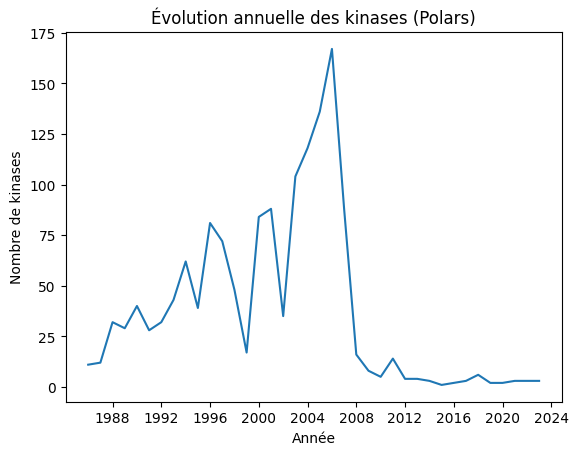

In [42]:
start_time = time.time()
kinases_by_year_polars = (
    polars_df
    .with_columns(pl.col("Creation date").dt.truncate("1y").alias("year"))
    .group_by("year")
    .agg(pl.count("Creation date").alias("count"))
    .sort("year")
)
years_array = kinases_by_year_polars["year"].to_numpy()
counts_array = kinases_by_year_polars["count"].to_numpy()
plt.plot(years_array, counts_array)
plt.title("Évolution annuelle des kinases (Polars)")
plt.xlabel("Année")
plt.ylabel("Nombre de kinases")
plt.savefig("kinases_polars.png")

execution_time_polars = time.time() - start_time
print(f"Temps d'exécution Polars : {execution_time_polars:.4f} secondes")

- **Lignes 3 à 6** :  
  - **Ligne 3** : Crée une nouvelle colonne `year` en tronquant les dates de la colonne `"Creation date"` à l'année la plus proche avec `.dt.truncate("1y")`.  
  - **Ligne 4** : Regroupe les données par la colonne `year` avec `.group_by("year")`.  
  - **Ligne 5** : Compte les occurrences dans la colonne `"Creation date"` pour chaque groupe d'années avec `pl.count("Creation date")` et nomme cette colonne `count` avec `.alias("count")`.  
  - **Ligne 6** : Trie les résultats par la colonne `year` dans l'ordre chronologique avec `.sort("year")`.

- **Ligne 8** : Convertit la colonne `year` en tableau NumPy avec `.to_numpy()` pour l'utiliser avec Matplotlib.

- **Ligne 9** : Convertit la colonne `count` en tableau NumPy avec `.to_numpy()` pour l'utiliser avec Matplotlib.

- **Ligne 11** : Trace un graphique avec les années (`years_array`) en abscisse et le nombre de kinases (`counts_array`) en ordonnée.

 Pandas utilise une chaîne d'opérations comprenant value_counts, resample et sum, ce qui nécessite une gestion des index et des étapes intermédiaires. En revanche, Polars adopte une méthode plus directe et performante, en extrayant les années avec .dt.truncate et en regroupant les données par année avec group_by. Bien que les deux approches produisent des résultats identiques, Polars offre une meilleure rapidité

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> 5. Transformation d'une colonne

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 5.1 Filtrer les lignes sans valeurs manquantes dans la colonne PDB

Nous commençons par filtrer les lignes qui contiennent une valeur non nulle dans la colonne PDB. Cela nous permet d'examiner le contenu de cette colonne.

<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;">
       En Pandas, isna() sélectionne les valeurs manquantes, et ~ inverse la sélection pour ne garder que les lignes avec des valeurs non nulles dans PDB.

En Polars, la syntaxe est similaire mais utilise pl.col("PDB").is_not_null() pour garder uniquement les lignes où PDB n'est pas null.

    
</div>
<br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>

In [43]:
start_time = time.time()
pandas_filtered = pandas_df.loc[~pandas_df["PDB"].isna()].head(3)
print(pandas_filtered)

execution_time_pandas = time.time() - start_time
print("Temps d'exécution Pandas : {:.4f} secondes".format(execution_time_pandas)) 

     Entry Organism  Length Creation date    Mass                   PDB
6   A2CG49    Mouse    2964    2007-10-23  337000            1WFW;7UR2;
15  D3ZMK9      Rat    1368    2018-07-18  147716                 6EWX;
30  O00141    Human     431    1998-12-15   48942  2R5T;3HDM;3HDN;7PUE;
Temps d'exécution Pandas : 0.0012 secondes


- **Ligne 2** : Filtre les lignes du DataFrame polars_df où la colonne "PDB" n'est pas None (non vide).
  - pl.col("PDB").is_not_null() : Sélectionne uniquement les lignes où la colonne "PDB" ne contient pas de valeurs nulles.
  - .filter(...) : Applique le filtre au DataFrame polars_df.
  - .head(3) : Limite le résultat aux 3 premières lignes après le filtrage.
  - Stocke le résultat filtré dans la variable polars_filtered.

- **Ligne 3** : Affiche les 3 premières lignes du DataFrame filtré, où la colonne "PDB" contient des valeurs non nulles.

<br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>


In [44]:
start_time = time.time()
polars_filtered = polars_df.filter(pl.col("PDB").is_not_null()).head(3)
print(polars_filtered)

execution_time_polars = time.time() - start_time
print(
    "Temps d'exécution pour le filtrage Polars : {:.4f} secondes".format(
        execution_time_polars
    )
)

shape: (3, 6)
┌────────┬──────────┬────────┬─────────────────────┬────────┬──────────────────────┐
│ Entry  ┆ Organism ┆ Length ┆ Creation date       ┆ Mass   ┆ PDB                  │
│ ---    ┆ ---      ┆ ---    ┆ ---                 ┆ ---    ┆ ---                  │
│ str    ┆ str      ┆ i64    ┆ datetime[μs]        ┆ i64    ┆ str                  │
╞════════╪══════════╪════════╪═════════════════════╪════════╪══════════════════════╡
│ A2CG49 ┆ Mouse    ┆ 2964   ┆ 2007-10-23 00:00:00 ┆ 337000 ┆ 1WFW;7UR2;           │
│ D3ZMK9 ┆ Rat      ┆ 1368   ┆ 2018-07-18 00:00:00 ┆ 147716 ┆ 6EWX;                │
│ O00141 ┆ Human    ┆ 431    ┆ 1998-12-15 00:00:00 ┆ 48942  ┆ 2R5T;3HDM;3HDN;7PUE; │
└────────┴──────────┴────────┴─────────────────────┴────────┴──────────────────────┘
Temps d'exécution pour le filtrage Polars : 0.0008 secondes


<div style="background-color: #f9f9f9; padding: 10px; border-left: 4px solid #007acc; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #007acc; font-size: 1.1em;">Syntaxe</strong> : 
    <ul style="margin-top: 5px;">
        <li><strong>Pandas</strong> utilise <code>isna()</code> et l’opérateur <code>~</code> pour inverser la condition, tandis que <strong>Polars</strong> utilise <code>is_not_null()</code>, qui vérifie directement si les valeurs ne sont pas nulles.</li>
        <li>Dans <strong>Pandas</strong>, on utilise <code>loc</code> pour appliquer le filtre, tandis que <strong>Polars</strong> utilise <code>.filter()</code> pour cette tâche.</li>
    </ul>
</div>

On observe que **Polars est plus rapide pour cette opération de filtrage**. Cela s'explique par l'architecture de Polars, qui est optimisée pour les calculs en mémoire et fonctionne plus efficacement sur de grandes quantités de données en utilisant des structures de données en colonnes.

Les deux bibliothèques renvoient les mêmes lignes pour les valeurs non nulles dans "PDB", ce qui valide la cohérence des résultats.

- **Ligne 2 a 3** : Utilise filter(pl.col("PDB").is_not_null()) pour conserver les lignes où "PDB" n'est pas null.et Affiche les trois premières lignes du DataFrame filtré.

<br>

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 5.2 Compter le nombre de structures 3D pour chaque protéine


La colonne PDB contient des identifiants de structures 3D séparés par des points-virgules. Pour chaque protéine, nous souhaitons compter le nombre d'identifiants 3D en comptant les points-virgules dans la chaîne de caractères.
<br>
<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;"> En Pandas, nous créons une fonction count_structures qui utilise isna pour tester si PDB est NaN et retourne 0 si c'est le cas, sinon elle compte les points-virgules. Nous appliquons ensuite cette fonction avec .apply() pour créer une nouvelle colonne nb_structures.

En Polars, nous pouvons réaliser cette opération avec une expression plus concise en utilisant pl.when pour gérer les valeurs manquantes et str.count(";") pour compter les points-virgules.   
</div>
<br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>


In [45]:
def count_structures(row):
    if pd.isna(row["PDB"]):
        return 0
    else:
        return row["PDB"].count(";")


start_time = time.time()

pandas_df["nb_structures"] = pandas_df.apply(count_structures, axis=1)
print(pandas_df.head())
execution_time = time.time() - start_time
print(
    "Comptage des structures 3D avec Pandas: {:.4f} secondes".format(
        execution_time
    )
)

        Entry   Organism  Length Creation date    Mass  PDB  nb_structures
0  A0A0B4J2F2      Human     783    2018-06-20   84930  NaN              0
1      A4L9P5        Rat    1211    2007-07-24  130801  NaN              0
2  A0A1D6E0S8      Maize     856    2023-05-03   93153  NaN              0
3  A0A8I5ZNK2        Rat     528    2023-09-13   58360  NaN              0
4      A1Z7T0  Fruit fly    1190    2012-01-25  131791  NaN              0
Comptage des structures 3D avec Pandas: 0.0067 secondes


- **Ligne 1** : Définit une fonction count_structures pour compter le nombre de structures 3D.
- **Ligne 2 à 3** : Teste si la valeur de "PDB" est NaN ; retourne 0 si vrai.
- **Ligne 5** : Si "PDB" n'est pas NaN, compte le nombre de points-virgules dans "PDB" pour indiquer le nombre de structures.
- **Ligne 7** : Applique count_structures à chaque ligne du DataFrame pandas_df et crée la colonne nb_structures.

<br>
<br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>


In [46]:
start_time = time.time()

polars_df = polars_df.with_columns(
    pl.when(pl.col("PDB").is_null())
    .then(0)
    .otherwise(pl.col("PDB").str.count_matches(";"))
    .alias("nb_structures")
)

execution_time_polars = time.time() - start_time
print(
    "Comptage des structures 3D avec Polars : {:.4f} secondes".format(
        execution_time_polars
    )
)
print(polars_df.head())

Comptage des structures 3D avec Polars : 0.0005 secondes
shape: (5, 7)
┌────────────┬───────────┬────────┬─────────────────────┬────────┬──────┬───────────────┐
│ Entry      ┆ Organism  ┆ Length ┆ Creation date       ┆ Mass   ┆ PDB  ┆ nb_structures │
│ ---        ┆ ---       ┆ ---    ┆ ---                 ┆ ---    ┆ ---  ┆ ---           │
│ str        ┆ str       ┆ i64    ┆ datetime[μs]        ┆ i64    ┆ str  ┆ u32           │
╞════════════╪═══════════╪════════╪═════════════════════╪════════╪══════╪═══════════════╡
│ A0A0B4J2F2 ┆ Human     ┆ 783    ┆ 2018-06-20 00:00:00 ┆ 84930  ┆ null ┆ 0             │
│ A4L9P5     ┆ Rat       ┆ 1211   ┆ 2007-07-24 00:00:00 ┆ 130801 ┆ null ┆ 0             │
│ A0A1D6E0S8 ┆ Maize     ┆ 856    ┆ 2023-05-03 00:00:00 ┆ 93153  ┆ null ┆ 0             │
│ A0A8I5ZNK2 ┆ Rat       ┆ 528    ┆ 2023-09-13 00:00:00 ┆ 58360  ┆ null ┆ 0             │
│ A1Z7T0     ┆ Fruit fly ┆ 1190   ┆ 2012-01-25 00:00:00 ┆ 131791 ┆ null ┆ 0             │
└────────────┴───────────┴───

- **Ligne 2** : Ajoute une nouvelle colonne nb_structures au DataFrame polars_df.
- **Ligne 3** : Utilise pl.when(pl.col("PDB").is_null()).then(0) pour retourner 0 si la valeur de "PDB" est null.
- **Ligne 6** : Utilise otherwise(pl.col("PDB").str.count(";")) pour compter les points-virgules si "PDB" n'est pas null.
- **Ligne 7** : Nomme cette colonne "nb_structures" avec alias("nb_structures").

Polars est nettement plus rapide que Pandas pour cette opération de comptage, exécutant la tâche environ 26 fois plus vite. Cela est dû à l'architecture de Polars, qui optimise les opérations en mémoire en utilisant des structures de données en colonnes, ce qui est particulièrement performant pour les tâches de transformation et d'agrégation.
<br><br>
Les deux bibliothèques produisent des résultats identiques, avec nb_structures égal à 0 pour les exemples de lignes affichées (les valeurs sont NaN ou null dans la colonne "PDB" pour ces lignes).

<div style="display: flex; align-items: center; justify-content: space-between;">
    <h3 style="color:#007BFF; margin: 0;"> 5.3 Trier les protéines par nombre de structures 3D

Nous voulons maintenant trouver les kinases ayant le plus de structures 3D référencées.
<div style="background-color: #f1f8ff; padding: 10px; border-left: 4px solid #007BFF; border-radius: 5px;">
    <strong style="display: flex; align-items: center; color: #007BFF;">
        <span style="font-size: 1.2em; margin-right: 5px;"></span>Remarque
    </strong>
    <p style="margin-top: 5px; color: #333;"> En Pandas, nous utilisons sort_values pour trier la colonne nb_structures en ordre décroissant, puis nous sélectionnons uniquement les colonnes Organism et nb_structures et affichons les cinq premières lignes.

En Polars, nous utilisons sort de manière similaire et sélectionnons les mêmes colonnes pour l'affichage. 
</div>
<br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Pandas
    </strong>
</div>


In [47]:
start_time = time.time()

top_structures_pandas = (
    pandas_df.sort_values(by="nb_structures", ascending=False)
    .filter(["Organism", "nb_structures"])
    .head()
)
print(top_structures_pandas)

execution_time_pandas = time.time() - start_time
print(
    "Temps d'exécution pour le tri avec Pandas : {:.4f} secondes".format(
        execution_time_pandas
    )
)

    Organism  nb_structures
306    Human            453
159    Human            284
663    Human            245
497    Human            238
227    Human            176
Temps d'exécution pour le tri avec Pandas : 0.0019 secondes


- **Ligne 4** : Trie polars_df en ordre décroissant par la colonne nb_structures en utilisant sort("nb_structures", reverse=True).
- **Ligne 5** : Sélectionne uniquement les colonnes Organism et nb_structures avec select(["Organism", "nb_structures"]).
- **Ligne 6** : Affiche les cinq premières lignes des protéines avec le plus de structures 3D pour examiner les résultats.
<br><br>
<div style="background-color: #e6f0ff; padding: 12px; border-left: 4px solid #004085; border-radius: 5px; margin-bottom: 10px;">
    <strong style="color: #004085; font-size: 1.1em;">
        🔹 Avec Polars
    </strong>
</div>

In [48]:
start_time = time.time()

top_structures_polars = (
    polars_df.sort("nb_structures", descending=True)
    .select(["Organism", "nb_structures"])
    .head()
)
print(top_structures_polars)

execution_time_polars = time.time() - start_time
print(
    "Temps d'exécution pour le tri avec polars: {:.4f} secondes".format(
        execution_time_polars
    )
)

shape: (5, 2)
┌──────────┬───────────────┐
│ Organism ┆ nb_structures │
│ ---      ┆ ---           │
│ str      ┆ u32           │
╞══════════╪═══════════════╡
│ Human    ┆ 453           │
│ Human    ┆ 284           │
│ Human    ┆ 245           │
│ Human    ┆ 238           │
│ Human    ┆ 176           │
└──────────┴───────────────┘
Temps d'exécution pour le tri avec polars: 0.0008 secondes


- **Ligne 4** : Trie polars_df en ordre décroissant par la colonne nb_structures en utilisant sort("nb_structures", reverse=True).
- **Ligne 5** : Sélectionne uniquement les colonnes Organism et nb_structures avec select(["Organism", "nb_structures"]).
- **Ligne 6** : Affiche les cinq premières lignes des protéines avec le plus de structures 3D pour examiner les résultats.

En terme de performance, le tri et l'affichage en Polars sont effectués beaucoup plus rapidement, en 0.0008 secondes contre 0.0054 secondes pour Pandas, mettant en avant l'efficacité de Polars sur les opérations de tri sur de grands ensembles de données.

Les resultats sont les même pour le deux, les cinq kinases avec le plus grand nombre de structures 3D référencées sont toutes d'origine humaine. 


<div style="display: flex; align-items: center; justify-content: space-between;">
    <h1 style="color:#007BFF; margin: 0;"> Conclusion

Polars redéfinit les standards de performance pour l’analyse de données volumineuses, offrant une rapidité inégalée dans les opérations intensives en calcul. Comme vu tout au long de ce tutoriel, Polars surpasse Pandas dans des tâches de filtrage, d’agrégation, et de tri sur des jeux de données volumineux. Par exemple, pour les regroupements annuels et les comptages, Polars a permis de réduire les temps d’exécution jusqu’à plusieurs fois, grâce à son architecture en colonnes et son traitement optimisé en mémoire. Cette efficacité fait de Polars une option idéale pour les projets nécessitant des analyses rapides sur de grands volumes de données.

Cependant, il est important de noter que Pandas reste un excellent choix pour les ensembles de données de taille moyenne, où la richesse de ses fonctionnalités et son écosystème mature sont des atouts précieux. Il est important de noter que Pandas est particulièrement adapté pour les manipulations de données légères ou pour des analyses où l’interopérabilité avec d’autres bibliothèques Python est cruciale.

Ce tutoriel montre ainsi que Polars n’est pas simplement une alternative à Pandas, mais une solution complémentaire qui excelle pour les traitements intensifs. En utilisant Polars pour les gros volumes de données et Pandas pour les ensembles plus modestes, les analystes peuvent tirer le meilleur parti des deux outils pour optimiser leurs workflows d’analyse.

Pour aller plus loin, dans les environnements de data engineering modernes, l’intégration de Polars ouvre de nouvelles perspectives pour les flux de données à grande échelle. Grâce à sa rapidité d’exécution et sa structure optimisée, Polars se prête particulièrement bien aux pipelines intensifs en données et pourrait être intégré avec des technologies comme Apache Arrow pour des systèmes distribués. En adoptant Polars, les analystes et data scientists disposent d’un outil qui leur permet de relever les défis de la science des données de demain, en combinant performance et flexibilité.